In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import argparse
import sharp
# make graphics inline
%matplotlib inline

In [2]:
cxiFile = '../../data/17554/hxn17554.cxi'
f = h5py.File(cxiFile, "r")
instrument_1 = f['entry_1/instrument_1'] # source, detector

# Source

In [3]:
energyJ = instrument_1['source_1/energy'][()] # in J
wavelength = 1.98644e-25/energyJ
print (energyJ, wavelength)

2.39330120482e-15 8.3e-11


# Probe

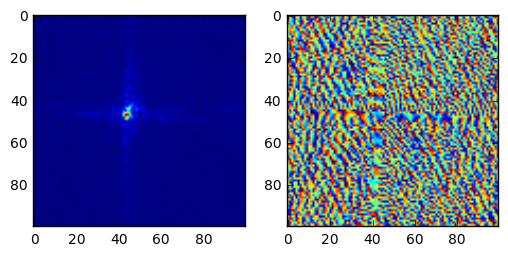

In [4]:
probe = instrument_1['source_1/illumination'][:]
plt.subplot(1,2,1)
plt.imshow(abs(probe))
plt.subplot(1,2,2)
plt.imshow(np.angle(probe))

# Detector

In [5]:
detector_1 = instrument_1['detector_1']
det_distance = detector_1['distance'][()] # in m
corner_position = detector_1['corner_position']
det_x_pixelsize = detector_1['x_pixel_size'][()] # in m
det_y_pixelsize = detector_1['y_pixel_size'][()] # in m
print (det_distance, det_x_pixelsize, det_y_pixelsize, corner_position[:])

0.5 5.5e-05 5.5e-05 [ 0.00275  0.00275  0.5    ]


(10000, (100, 100), dtype('float64'))

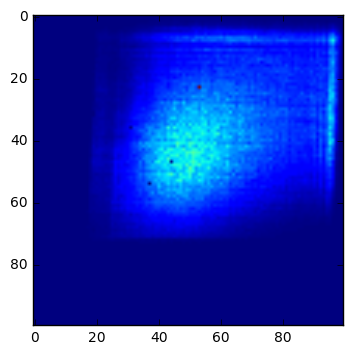

In [6]:
frames = detector_1['data']
plt.imshow(frames[0])
len(frames), frames[0].shape, frames[0][0].dtype

In [7]:
det_side = frames[0].shape[0]
real_pixel_size = det_distance*wavelength/(det_side*det_x_pixelsize)
print (det_side, real_pixel_size)

100 7.54545454545e-09


# Initial object

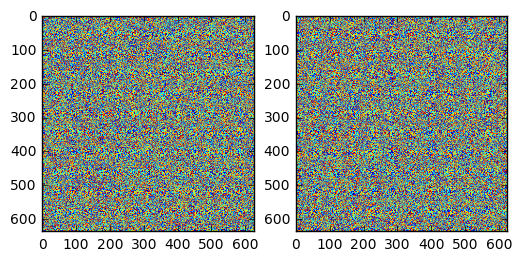

In [8]:
initial_image = detector_1['initial_image'][:]
plt.subplot(1,2,1)
plt.imshow(abs(initial_image))
plt.subplot(1,2,2)
plt.imshow(np.angle(initial_image))

# Scan

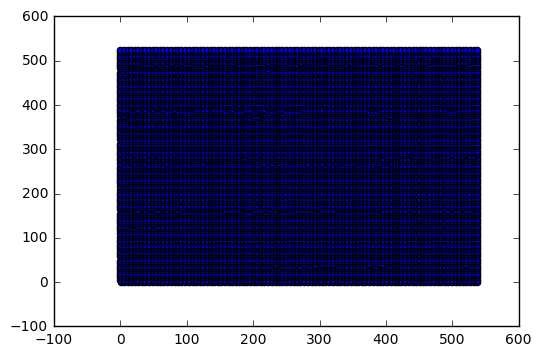

10000 10000


In [9]:
sample_1 = f['entry_1/sample_1'] # scan
translation = sample_1['geometry_1/translation']/real_pixel_size
X = translation[:, 1]
Y = translation[:, 0]
plt.scatter(X, Y)
plt.show()
print(len(X), len(Y))